ue: 0.0013096123891399524
            Iterations: 18
            Function evaluations: 149
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0013089838257727793
            Iterations: 18
            Function evaluations: 151
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0013089838257727793
            Iterations: 18
            Function evaluations: 151
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0013089838257727793
            Iterations: 18
            Function evaluations: 151
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0013089838257727793
            Iterations: 18
            Function evaluations: 151
            Gradient evaluations: 18
Optimization ter

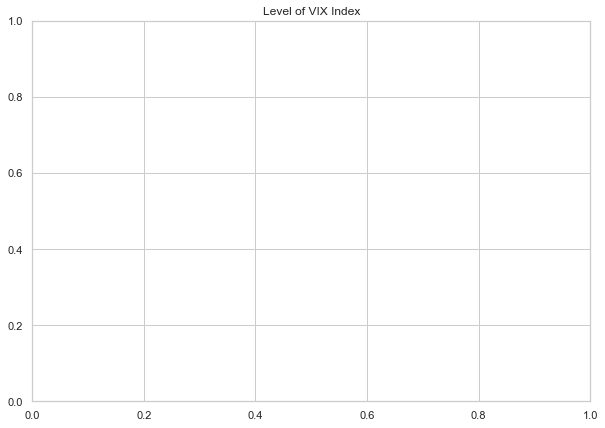

In [1]:
from Assignment3_part1 import *

## Variables qui nous intéressent

* SAA_weights_IS
* SAA_weights_OS
* TAA_weights_IS
* TAA_weights_OS
* weight_target_IS
* weight_target_IS

Benchmark (50% Equities / 50% Bond)

Return

returns_IS_price
returns_0S_price

In [4]:
returns_IS_price

,World Equities,World Bonds,US Investment Grade,US High Yield,Gold,Energy,Copper
Dates,,,,,,,
2000-10-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-11-30,-0.063671,0.017760,0.014138,-0.031831,0.019792,0.158897,0.000594
2000-12-29,0.015015,0.013164,0.019371,0.021453,0.006634,0.056517,0.003720
2001-01-31,0.018634,0.011578,0.026018,0.057924,-0.023789,-0.062854,0.018433
2001-02-28,-0.089342,0.009859,0.009764,0.015669,0.004878,-0.013012,-0.035213
...,...,...,...,...,...,...,...
2010-08-31,-0.040023,0.018150,0.021655,0.002333,0.054700,-0.129420,-0.014409
2010-09-30,0.087219,-0.003176,0.005885,0.028926,0.047851,0.044871,0.097983
2010-10-29,0.035849,-0.003766,0.002097,0.023663,0.038131,-0.012476,0.017233
